In [1]:
from torchvision import models
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

In [2]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
# Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [3]:
batch_size = 128

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',
                                         train=True,
                                         download=True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#Part 1
Dataset is normalized to start other preprocessing in part 2

In [4]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [5]:
trainset.data.shape

(50000, 32, 32, 3)

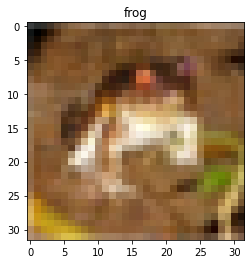

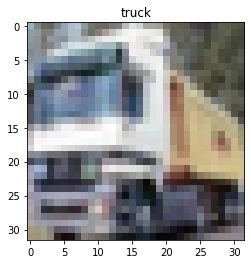

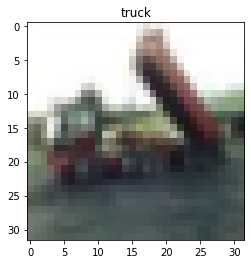

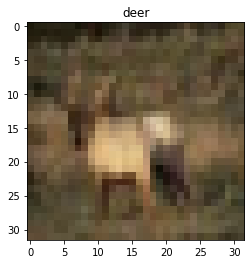

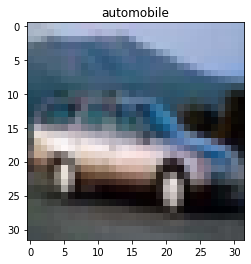

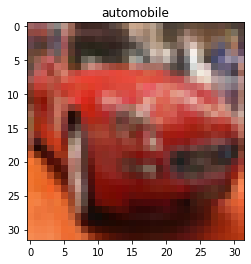

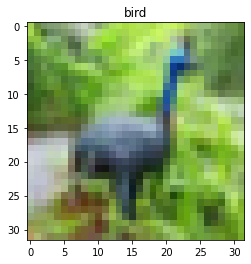

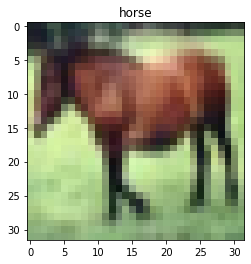

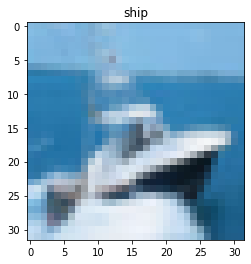

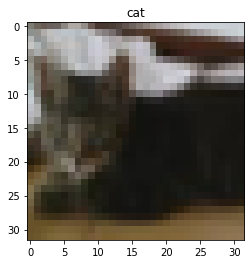

In [6]:
Nimg = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(Nimg)):
  plt.imshow(trainset.data[i])
  plt.title(trainset.classes[trainset.targets[i]])
  plt.show()

#Convolutional Layers

In [7]:
ConvLayer1 = torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = (5,5), stride = 3)

In [8]:
Output1 = ConvLayer1(torch.tensor(trainset.data[:10]).reshape(10, 3, 32, 32).float())

In [9]:
Output1.shape

torch.Size([10, 16, 10, 10])

In [10]:
ConvLayer1.weight.shape

torch.Size([16, 3, 5, 5])

In [11]:
MaxL = torch.nn.MaxPool2d(kernel_size = (1,1))

In [12]:
Outputm = MaxL(Output1)

In [13]:
Outputm.shape 

torch.Size([10, 16, 10, 10])

In [14]:
ConvTLayer1 = torch.nn.ConvTranspose2d(in_channels = 16, out_channels = 3, kernel_size = (15,15))

In [15]:
Rec = ConvTLayer1(Outputm)

In [16]:
Rec.shape

torch.Size([10, 3, 24, 24])

#pretrained Models (Resnet)

In [17]:
model = models.resnet18(pretrained = True)

In [18]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
    imagenet_labels = [line.strip() for line in f.readlines()]

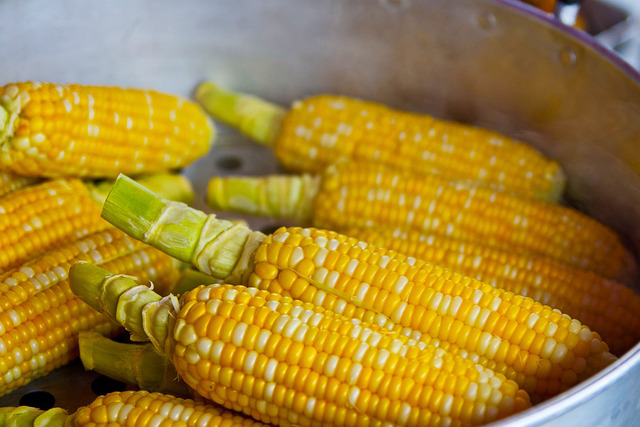

In [20]:
from PIL import Image
myCorn = Image.open("corn_pic2.jpg")
myCorn

#uncomment following code block to see that corn gets correctly identified before trick transform

In [21]:
# simpleTransform = transforms.Compose([
#     transforms.Resize((224,224)),
#     transforms.ToTensor()
# ])

# myCorn = simpleTransform(myCorn)

# model.eval()

# output_unprocessed = model(myCorn.unsqueeze(0))
# probs = torch.nn.Softmax()(output_unprocessed)
# imagenet_labels[probs.argmax()]

In [39]:
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.ColorJitter(),
    transforms.GaussianBlur(51)
])
myCornT = preprocess(myCorn)

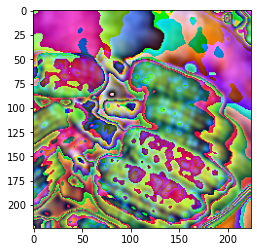

In [40]:
plt.imshow(transforms.ToPILImage()(myCornT))

In [41]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
outputK = model(myCornT.unsqueeze(0))

In [43]:
probs = torch.nn.Softmax()(outputK)

C:\Users\arist\AppData\Local\Temp\ipykernel_14044\4209127464.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = torch.nn.Softmax()(outputK)


In [44]:
probs.shape

torch.Size([1, 1000])

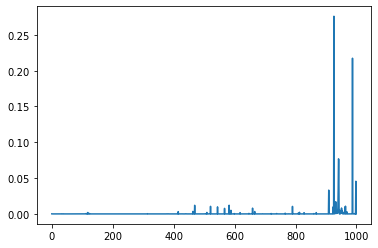

In [45]:
plt.plot(probs.detach().cpu()[0])

In [46]:
imagenet_labels[probs.argmax()]

"926: 'hot pot, hotpot',"

#Transfer Learning

In [30]:
from torch.utils.data.sampler import SubsetRandomSampler

valid_size = 0.1

In [31]:
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

simpleTransform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

myCorn = simpleTransform(myCorn)

trainset = torchvision.datasets.CIFAR10(root='./data',
                                         train=True,
                                         download=True,
                                         transform = simpleTransform)

num_train = len(trainset)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

Files already downloaded and verified


In [32]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128)

valid_loader = torch.utils.data.DataLoader(trainset,
                                               batch_size=128,
                                               sampler=valid_sampler)

In [33]:
testset = torchvision.datasets.CIFAR10(root='./data',
                                         train=False,
                                         download=True,
                                         transform = simpleTransform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 128)

Files already downloaded and verified


In [34]:
images, labels = next(iter(trainloader))

In [35]:
testimages, testlabels = next(iter(testloader))

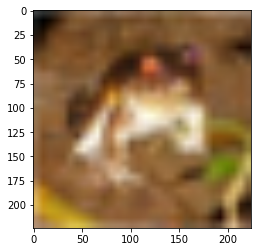

In [36]:
plt.imshow(transforms.ToPILImage()(images[0]))

In [37]:
output1layer = model.conv1(images[0].unsqueeze(0))

In [38]:
output1layer.shape

torch.Size([1, 64, 112, 112])

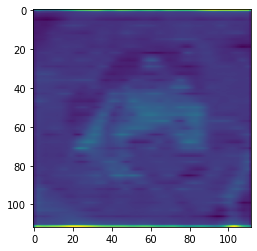

In [39]:
plt.imshow(output1layer[0, 10].detach())

In [40]:
# for paramt in model.parameters():
#     paramt.requires_grad= False

In [41]:
#viewing layers
child_counter = 0
for child in model.children():
    print(" child", child_counter, "is:")
    print(child)
    child_counter += 1

 child 0 is:
Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
 child 1 is:
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 child 2 is:
ReLU(inplace=True)
 child 3 is:
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
 child 4 is:
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64

In [42]:
#freezing layers
child_counter = 0
for child in model.children():
    if child_counter < 4:
        print("child ",child_counter," was frozen")
        for param in child.parameters():
            param.requires_grad = False
    elif child_counter == 4:
        children_of_child_counter = 0
        for children_of_child in child.children():
            if children_of_child_counter > 3:
                for param in children_of_child.parameters():
                    param.requires_grad = False
                print('child ', children_of_child_counter, 'of child',child_counter,' was frozen')
            else:
                print('child ', children_of_child_counter, 'of child',child_counter,' was not frozen')
            children_of_child_counter += 1
    elif child_counter < 9:
        print("child ",child_counter," was frozen")
        for param in child.parameters():
            param.requires_grad = False
    else:
        print("child ",child_counter," was not frozen")
    child_counter += 1

child  0  was frozen
child  1  was frozen
child  2  was frozen
child  3  was frozen
child  0 of child 4  was not frozen
child  1 of child 4  was not frozen
child  5  was frozen
child  6  was frozen
child  7  was frozen
child  8  was frozen
child  9  was not frozen


In [43]:
# model.layer1.0.conv1 = torch.nn.Conv2d(64, 64, kernel_size=(3, 3))

# model.fc = torch.nn.Linear(512, 10)

In [44]:
loss_f = torch.nn.CrossEntropyLoss()

In [45]:
# optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [46]:
# Define best_score, counter, and patience for early stopping:
best_score = None
counter = 0
patience = 15
path = 'checkpoints/' # user_defined path to save model

epoch_iter = []
train_accuracy = []
epoch = 0


Nepochs = 2
model.train()
for i in range(Nepochs):
    for j, batch in enumerate(trainloader):
        images, labels = batch
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_f(outputs, labels)

        
        if best_score is None:
            best_score = loss
        else:
        # Check if val_loss improves or not.
            if loss < best_score:
                # val_loss improves, we update the latest best_score, 
                # and save the current model
                best_score = loss
                # torch.save({'state_dict':model.state_dict()}, path)
            else:
                # val_loss does not improve, we increase the counter, 
                # stop training if it exceeds the amount of patience
                counter += 1
                if counter >= patience:
                    break

        # Load best model 
        # print('loading model before testing.')
        # model_checkpoint = torch.load(path)

        # model.load_state_dict(model_checkpoint['state_dict']) 
        epoch_iter.append(epoch)
        epoch = epoch + 1
                
        pred_y = torch.max(outputs, 1)[1].data.squeeze()
        accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        train_accuracy.append(accuracy)
        
        loss.backward()
        optimizer.step()
        print(loss.item())

10.043679237365723
9.739123344421387
9.506309509277344
9.337236404418945
9.46024227142334
9.150606155395508
9.195337295532227
9.039435386657715
8.763679504394531
8.847331047058105
8.863837242126465
8.376891136169434
8.846819877624512
8.327363967895508
8.513717651367188
8.628103256225586
8.190567970275879
8.028486251831055
7.694031238555908
8.154850959777832
8.046690940856934
7.530463695526123
7.865907192230225
7.450602054595947
7.112439155578613
7.690922260284424
7.612272262573242
7.187777996063232
7.148064136505127
6.886358261108398
6.641587257385254
6.585075378417969
6.2321343421936035


In [47]:
model.eval()
output = model(testimages)

In [48]:
# y_pred = model.predict(X_test)
pred_y = torch.max(output, 1)[1].data.squeeze()
accuracy = (pred_y == testlabels).sum().item() / float(testlabels.size(0))
print(accuracy)
# accuracy_score(output, labels)

0.015625


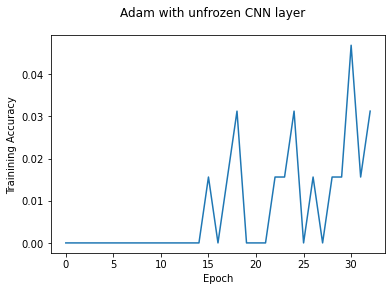

In [49]:
plt.plot(epoch_iter, train_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Trainining Accuracy')
plt.suptitle('Adam with unfrozen CNN layer')
# plt.savefig('hw4' + 'adam_accuracy.png')
plt.show()